Imports

In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
from preprocess import *
from regressor import *

Configuration

In [2]:
with open("config/config.yml", "r") as file:
    config = yaml.safe_load(file)
    
hyperparams = config["hyperparameters"]
n_channels = hyperparams["n_channels"]
n_samples = hyperparams["n_samples"]
spike_count = hyperparams["spike_count"]
sfreq = hyperparams["sfreq"]
tr = hyperparams["tr"]

Electrodes Postions

In [3]:
electrode_positions = config["electrode_positions"]
electrode_labels = list(electrode_positions.keys())[:n_channels]
electrode_positions_used = {label: electrode_positions[label] for label in electrode_labels}
electrode_positions_used

{'Fp1': [-0.3, 0.8],
 'Fp2': [0.3, 0.8],
 'F7': [-0.8, 0.5],
 'F8': [0.8, 0.5],
 'F3': [-0.5, 0.5],
 'Fz': [0, 0.6],
 'F4': [0.5, 0.5],
 'T7': [-1, 0],
 'C3': [-0.5, 0],
 'Cz': [0, 0],
 'C4': [0.5, 0],
 'T8': [1, 0],
 'P7': [-0.8, -0.5],
 'P3': [-0.5, -0.5],
 'Pz': [0, -0.6],
 'P4': [0.5, -0.5],
 'P8': [0.8, -0.5],
 'O1': [-0.3, -0.8],
 'Oz': [0, -0.8]}

EEG Signal with Spike Timing

In [4]:
eeg_outside_data = np.random.randn(n_channels, n_samples)
eeg_inside_data = np.random.randn(n_channels, n_samples)
spike_timing = np.random.choice(np.arange(50, n_samples - 50, 10), size=spike_count, replace=False)

Preprocessed EEG (outside scanner)

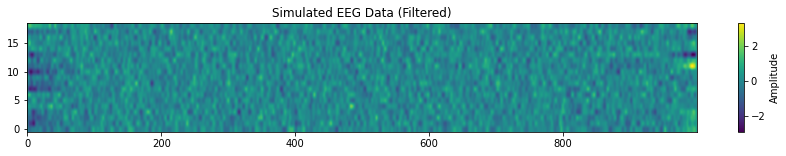

In [5]:
eeg_outside_filtered = preprocess_eeg(eeg_outside_data, sfreq=250)

plt.figure(figsize=(15, 2))
plt.title("Simulated EEG Data (Filtered)")
plt.imshow(eeg_outside_filtered, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Amplitude')
plt.savefig("results/eeg.png", dpi=300, bbox_inches='tight')
plt.show()

Preprocessed EEG (inside scanner)

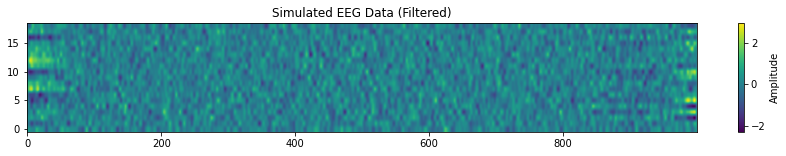

In [6]:
eeg_inside_filtered = preprocess_eeg(eeg_inside_data, sfreq=250)

plt.figure(figsize=(15, 2))
plt.title("Simulated EEG Data (Filtered)")
plt.imshow(eeg_inside_filtered, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Amplitude')
plt.savefig("results/eeg_inside.png", dpi=300, bbox_inches='tight')
plt.show()

Activity Map with Topography

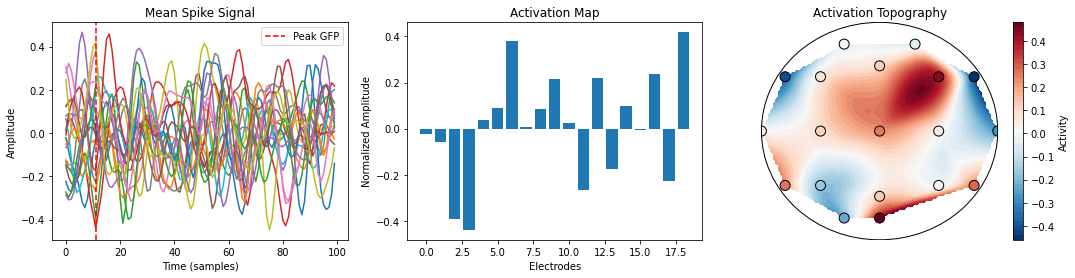

In [7]:
epileptic_map, mean_spike, gfp, peak_idx = activity_map(eeg_outside_filtered, spike_timing)

plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Mean Spike Signal")
plt.plot(mean_spike.T)
plt.axvline(x=peak_idx, color='r', linestyle='--', label='Peak GFP')
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(1, 3, 2)
plt.title("Activation Map")
plt.bar(range(len(epileptic_map)), epileptic_map)
plt.xlabel("Electrodes")
plt.ylabel("Normalized Amplitude")

plt.subplot(1, 3, 3)
epileptic_topography = generate_topography(epileptic_map, electrode_positions_used)

plt.savefig("results/spike_map.png", dpi=300, bbox_inches='tight')
plt.show()

Spatial Correlation

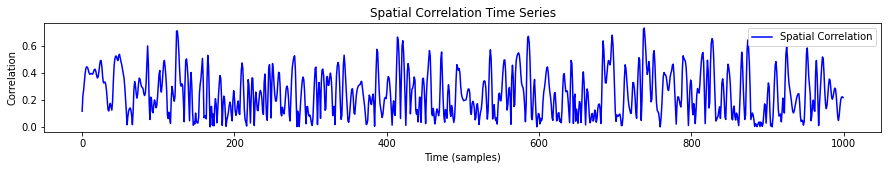

In [8]:
correlation_series = spatial_corr_with_topography(eeg_inside_filtered, epileptic_topography, electrode_positions_used)
np.savetxt("results/correlation_series.txt", correlation_series, fmt="%.6f", newline="\n")

plt.figure(figsize=(15, 2))
plt.title("Spatial Correlation Time Series")
plt.plot(correlation_series, label='Spatial Correlation', color='b')
plt.xlabel("Time (samples)")
plt.ylabel("Correlation")
plt.legend()
plt.savefig("results/correlation_series.png", dpi=300, bbox_inches='tight')
plt.show()

Convolution with HRF

c:\Users\Mostafa\anaconda3\envs\neuroimaging\lib\site-packages\nilearn\glm\__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


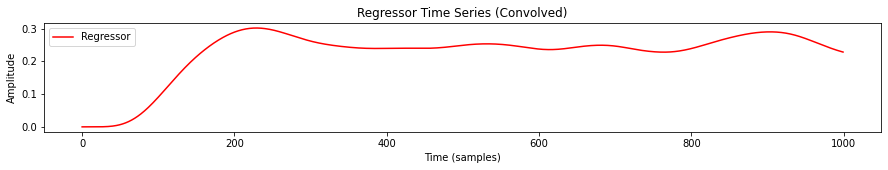

In [9]:
regressor = conv_hrf(correlation_series, tr)
np.savetxt("results/regressor.txt", correlation_series, fmt="%.6f", newline="\n")

plt.figure(figsize=(15, 2))
plt.title("Regressor Time Series (Convolved)")
plt.plot(regressor, label='Regressor', color='r')
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.savefig("results/regressor.png", dpi=300, bbox_inches='tight')
plt.show()